<br>
<img src="img/Capa.png">
<br>

# OBJETIVO
Realizar o processo de ETL (Extração, Transformação e Leitura) da fonte de dados do CAGED e elaborar uma hipótese para ser rejeitada ou não-rejeitada.

# METODOLOGIA
<br>
<img src="img/Metodologia.png">
<br>

# ETAPAS

<br>
<img src="img/Importação Bibliotecas.png">
<br>

Neste momento visualizamos a estrutura e conteúdo do arquivo, e identificamos a necessidade de alterar nomenclaturas das colunas, tipos de dados e valores de algumas variáveis.

**Importação das bibliotecas necessárias para leitura, transformação e visualização dos dados (ETL)**

In [1]:
#importa bibliotecas
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Leitura dos dados e importação em um dataframe**

In [2]:
data = pd.read_csv('Fonte IBGE/CAGEDEST_122018.txt', encoding = 'ISO-8859-1', decimal = ',', delimiter = ';')

**Visualizar o número de variáveis (linhas) e parâmetros (colunas) do dataframe**

In [3]:
data.shape

(2256752, 42)

**Listagem das colunas existentes no dataframe**

In [4]:
data.columns

Index(['Admitidos/Desligados', 'Competência Declarada', 'Município',
       'Ano Declarado', 'CBO 2002 Ocupação', 'CNAE 1.0 Classe',
       'CNAE 2.0 Classe', 'CNAE 2.0 Subclas', 'Faixa Empr Início Jan',
       'Grau Instrução', 'Qtd Hora Contrat', 'IBGE Subsetor', 'Idade',
       'Ind Aprendiz', 'Ind Portador Defic', 'Raça Cor', 'Salário Mensal',
       'Saldo Mov', 'Sexo', 'Tempo Emprego', 'Tipo Estab', 'Tipo Defic',
       'Tipo Mov Desagregado', 'UF', 'Bairros SP', 'Bairros Fortaleza',
       'Bairros RJ', 'Distritos SP', 'Regiões Adm DF', 'Mesorregião',
       'Microrregião', 'Região Adm RJ', 'Região Adm SP', 'Região Corede',
       'Região Corede 04', 'Região Gov SP', 'Região Senac PR',
       'Região Senai PR', 'Região Senai SP', 'Sub-Região Senai PR',
       'Ind Trab Parcial', 'Ind Trab Intermitente'],
      dtype='object')

**Alteração do nome das colunas para facilitar a análise**

In [5]:
#renomeia o nome das colunas para facilitar a analize
data.rename(columns={'Admitidos/Desligados': 'admitidos_desligados', 
                     'Competência Declarada': 'competencia_declarada', 
                     'Município': 'municipio',
                     'Ano Declarado' : 'ano_declarado',
                     'CBO 2002 Ocupação' : 'cbo_2002_ocupacao',
                     'CNAE 1.0 Classe' : 'cnae_10_classe',
                     'CNAE 2.0 Classe' : 'cnae_20_classe',
                     'CNAE 2.0 Subclas' : 'cnae_20_subclas',
                     'Faixa Empr Início Jan' : 'faixa_empr_ini_jan',
                     'Grau Instrução' : 'grau_instrucao',
                     'Qtd Hora Contrat' : 'qtd_hora_contrat',
                     'IBGE Subsetor' : 'ibge_subsetor',
                     'Idade' : 'idade',
                     'Ind Aprendiz' : 'ind_aprendiz', 
                     'Ind Portador Defic' : 'ind_portador_defic',
                     'Raça Cor' : 'raca_cor',
                     'Salário Mensal':'salario_mensal',
                     'Saldo Mov':'salario_mov',
                     'Sexo':'sexo',
                     'Tempo Emprego':'tempo_emprego',
                     'Tipo Estab':'tipo_estab',
                     'Tipo Defic':'tipo_defic',
                     'Tipo Mov Desagregado':'tipo_mov_desagregado',
                     'UF':'uf',
                     'Bairros SP':'bairros_sp',
                     'Bairros Fortaleza':'bairros_fortaleza',
                     'Bairros RJ':'bairros_rj',
                     'Distritos SP':'distritos_sp',
                     'Regiões Adm DF':'regioes_adm_df',
                     'Mesorregião':'mesoregiao',
                     'Microrregião':'microregiao',
                     'Região Adm RJ':'regiao_adm_rj',
                     'Região Adm SP':'regiao_adm_sp',
                     'Região Corede':'regiao_corede',
                     'Região Corede 04':'regiao_corede_04',
                     'Região Gov SP':'regiao_gov_sp',
                     'Região Senac PR':'regiao_senac_pr',
                     'Região Senai PR':'regiao_senai_pr',
                     'Região Senai SP':'regiao_senai_sp',
                     'Sub-Região Senai PR':'subregiao_senai_pr',
                     'Ind Trab Parcial':'ind_trab_parcial',
                     'Ind Trab Intermitente':'ind_trab_intermitente'}, inplace=True)

**Mostra as colunas renomeadas**

In [6]:
data.columns

Index(['admitidos_desligados', 'competencia_declarada', 'municipio',
       'ano_declarado', 'cbo_2002_ocupacao', 'cnae_10_classe',
       'cnae_20_classe', 'cnae_20_subclas', 'faixa_empr_ini_jan',
       'grau_instrucao', 'qtd_hora_contrat', 'ibge_subsetor', 'idade',
       'ind_aprendiz', 'ind_portador_defic', 'raca_cor', 'salario_mensal',
       'salario_mov', 'sexo', 'tempo_emprego', 'tipo_estab', 'tipo_defic',
       'tipo_mov_desagregado', 'uf', 'bairros_sp', 'bairros_fortaleza',
       'bairros_rj', 'distritos_sp', 'regioes_adm_df', 'mesoregiao',
       'microregiao', 'regiao_adm_rj', 'regiao_adm_sp', 'regiao_corede',
       'regiao_corede_04', 'regiao_gov_sp', 'regiao_senac_pr',
       'regiao_senai_pr', 'regiao_senai_sp', 'subregiao_senai_pr',
       'ind_trab_parcial', 'ind_trab_intermitente'],
      dtype='object')

**Altera os valores numéricos para as Siglas na coluna Estados e exibe o resultado**

In [7]:
siglas = pd.read_csv('Fonte IBGE/siglas.csv', encoding = 'UTF-8', delimiter = ';')
data = pd.merge(data, siglas, on ='uf', how='outer')

def remove_repetidos(lista):
    l = []
    for i in lista:
       if i not in l:
            l.append(i)
    l.sort()
    return l

lista = data['grau_instrucao']
lista = data['estado']

lista2 = remove_repetidos(lista)
print (lista2)

['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Paraná', 'Paraíba', 'Pará', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Rio Grande do Sul (*)', 'Rio de Janeiro', 'Rondônia', 'Roraima', 'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']


In [11]:
siglas.head(20)

,uf,estado,sigla
0,11,Rondônia,RO
1,12,Acre,AC
2,13,Amazonas,AM
3,14,Roraima,RR
4,15,Pará,PA
5,16,Amapá,AP
6,17,Tocantins,TO
7,21,Maranhão,MA
8,22,Piauí,PI
9,23,Ceará,CE


**Verifica informações da estrutura dos parâmetros do dataframe**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256752 entries, 0 to 2256751
Data columns (total 44 columns):
admitidos_desligados     int64
competencia_declarada    int64
municipio                int64
ano_declarado            int64
cbo_2002_ocupacao        int64
cnae_10_classe           int64
cnae_20_classe           int64
cnae_20_subclas          int64
faixa_empr_ini_jan       int64
grau_instrucao           int64
qtd_hora_contrat         int64
ibge_subsetor            int64
idade                    int64
ind_aprendiz             int64
ind_portador_defic       int64
raca_cor                 int64
salario_mensal           float64
salario_mov              int64
sexo                     int64
tempo_emprego            float64
tipo_estab               int64
tipo_defic               int64
tipo_mov_desagregado     int64
uf                       int64
bairros_sp               object
bairros_fortaleza        object
bairros_rj               object
distritos_sp             object
regioes_adm

**Verifica a distribuição numérica dos dados**

In [13]:
data.describe()

,admitidos_desligados,competencia_declarada,municipio,ano_declarado,cbo_2002_ocupacao,cnae_10_classe,cnae_20_classe,cnae_20_subclas,faixa_empr_ini_jan,grau_instrucao,...,tempo_emprego,tipo_estab,tipo_defic,tipo_mov_desagregado,uf,regioes_adm_df,mesoregiao,microregiao,ind_trab_parcial,ind_trab_intermitente
count,2.256752e+06,2256752.0,2.256752e+06,2256752.0,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,...,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06
mean,1.574103e+00,201812.0,3.553863e+05,2018.0,5.368213e+05,5.304958e+04,5.126839e+04,5.126847e+06,4.303066e+00,6.595547e+00,...,1.318030e+01,1.084850e+00,1.553693e-02,6.216255e+00,3.534381e+01,7.773592e-01,3.540988e+03,3.537022e+04,4.852106e-03,5.339089e-03
std,4.944784e-01,0.0,8.300073e+04,0.0,1.784826e+05,2.269392e+04,2.468035e+04,2.468034e+06,2.646710e+00,1.548538e+00,...,3.413455e+01,4.031142e-01,2.154446e-01,9.922202e+00,8.311311e+00,8.125151e+01,8.309257e+02,8.310356e+03,6.948788e-02,7.287376e-02
min,1.000000e+00,201812.0,1.100010e+05,2018.0,3.011000e+04,1.112000e+03,1.113000e+03,1.113010e+05,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.101000e+03,1.100100e+04,0.000000e+00,0.000000e+00
25%,1.000000e+00,201812.0,3.147000e+05,2018.0,4.141050e+05,4.525000e+04,4.213800e+04,4.213800e+06,2.000000e+00,6.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,3.100000e+01,0.000000e+00,3.108000e+03,3.103900e+04,0.000000e+00,0.000000e+00
50%,2.000000e+00,201812.0,3.531500e+05,2018.0,5.174100e+05,5.241800e+04,4.773300e+04,4.773300e+06,4.000000e+00,7.000000e+00,...,2.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,3.500000e+01,0.000000e+00,3.512000e+03,3.504600e+04,0.000000e+00,0.000000e+00
75%,2.000000e+00,201812.0,4.117900e+05,2018.0,7.152100e+05,7.412800e+04,7.490100e+04,7.490102e+06,6.000000e+00,7.000000e+00,...,1.100000e+01,1.000000e+00,0.000000e+00,6.000000e+00,4.100000e+01,0.000000e+00,4.110000e+03,4.103700e+04,0.000000e+00,0.000000e+00
max,2.000000e+00,201812.0,5.300100e+05,2018.0,9.922250e+05,9.900700e+04,9.900800e+04,9.900800e+06,9.000000e+00,9.000000e+00,...,5.990000e+02,3.000000e+00,6.000000e+00,9.000000e+01,5.300000e+01,9.999000e+03,5.301000e+03,5.300100e+04,1.000000e+00,1.000000e+00


# Considerações

O dataframe possui 44 colunas e será necessário eliminar as que não apresentarem correlação com o objetivo proposto.

<br>
<img src="img/Transformação.png">
<br>

**Verifica se o Salário Mensal possui valores NaN, nulos ou menores que zero**

In [14]:
qtd_nan = data['salario_mensal'].isna().sum()
qtd_null = data['salario_mensal'].isnull().sum()
qtd_zeros = data[data['salario_mensal'] < 0]['salario_mensal'].count()
print("Qtd Valores NaN:",qtd_nan)
print("Qtd Valores Nulos",qtd_null)
print("Qtd Valores Menores que Zero",qtd_zeros)

Qtd Valores NaN: 0
Qtd Valores Nulos 0
Qtd Valores Menores que Zero 0


# Mostrar o tipo de dados

In [15]:
data.salario_mensal.dtypes

dtype('float64')

# Calcular média, variância e desvio padrão da variável Salário Mensal

In [16]:
n_salario = len(data.salario_mensal)
mean_salario = data.salario_mensal.mean()
std_amostral_salario = np.std(data.salario_mensal, ddof=1) 
var_amostral_salario = std_amostral_salario**2

print('Registros:',n_salario)
print('Média:',mean_salario)
print('Desvio-Padrão:',std_amostral_salario)
print('Varância:',var_amostral_salario)

Registros: 2256752
Média: 1627.2442231135722
Desvio-Padrão: 2097.520546695418
Varância: 4399592.443809445


# Considerações

a. Desvio padrão amostral e populacional quase idênticos, dado que n é muito alto

b. Outro metodo, porém calcula dp populacional: data.salario_mensal.describe()

# Plota o histograma para variável Salário Mensal

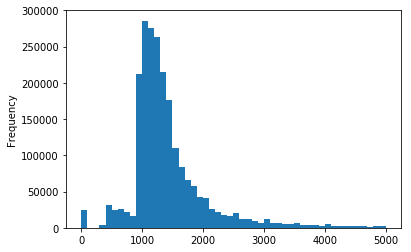

In [17]:
data.salario_mensal.plot.hist(bins=50, range=(0,5000))

# Verifica se é uma distribuição normal com a função scipy.stats.shapiro

In [18]:
stats.shapiro(data.salario_mensal)

(0.2637892961502075, 0.0)

# Normaliza a curva utilizando LOG (numpy.log) e salva em uma nova coluna "salario_log"

Observação: Soma +1 no salário para evitar erros de log = 0 o que tendem ao infinito negativo

In [19]:
data["salario_log"] = np.log(data.salario_mensal+1)

# Plota o histograma para verificar a distribuicao depois da normalização

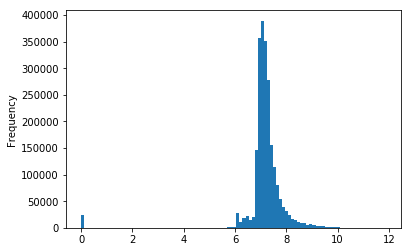

In [20]:
data.salario_log.plot.hist(bins=100)

# Verifica se é uma distribuição normal com a função scipy.stats.shapiro para salario_log (precisa se aproximar de (1,0))

In [21]:
stats.shapiro(data.salario_log)

(0.5028517246246338, 0.0)

# Calcula a padronização Z

In [22]:
data["salario_padrao"] = ( data.salario_log - data.salario_log.mean() ) / data.salario_log.std()

# Plota o histograma do salario normalizado e padronizado em Z

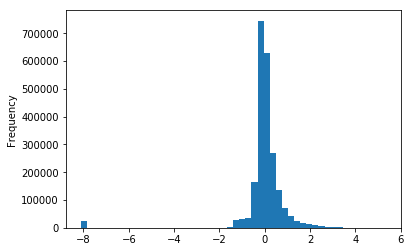

In [23]:
data.salario_padrao.plot.hist(bins=50)

# Plota todos os gráficos com a curva de densidade de probabilidade

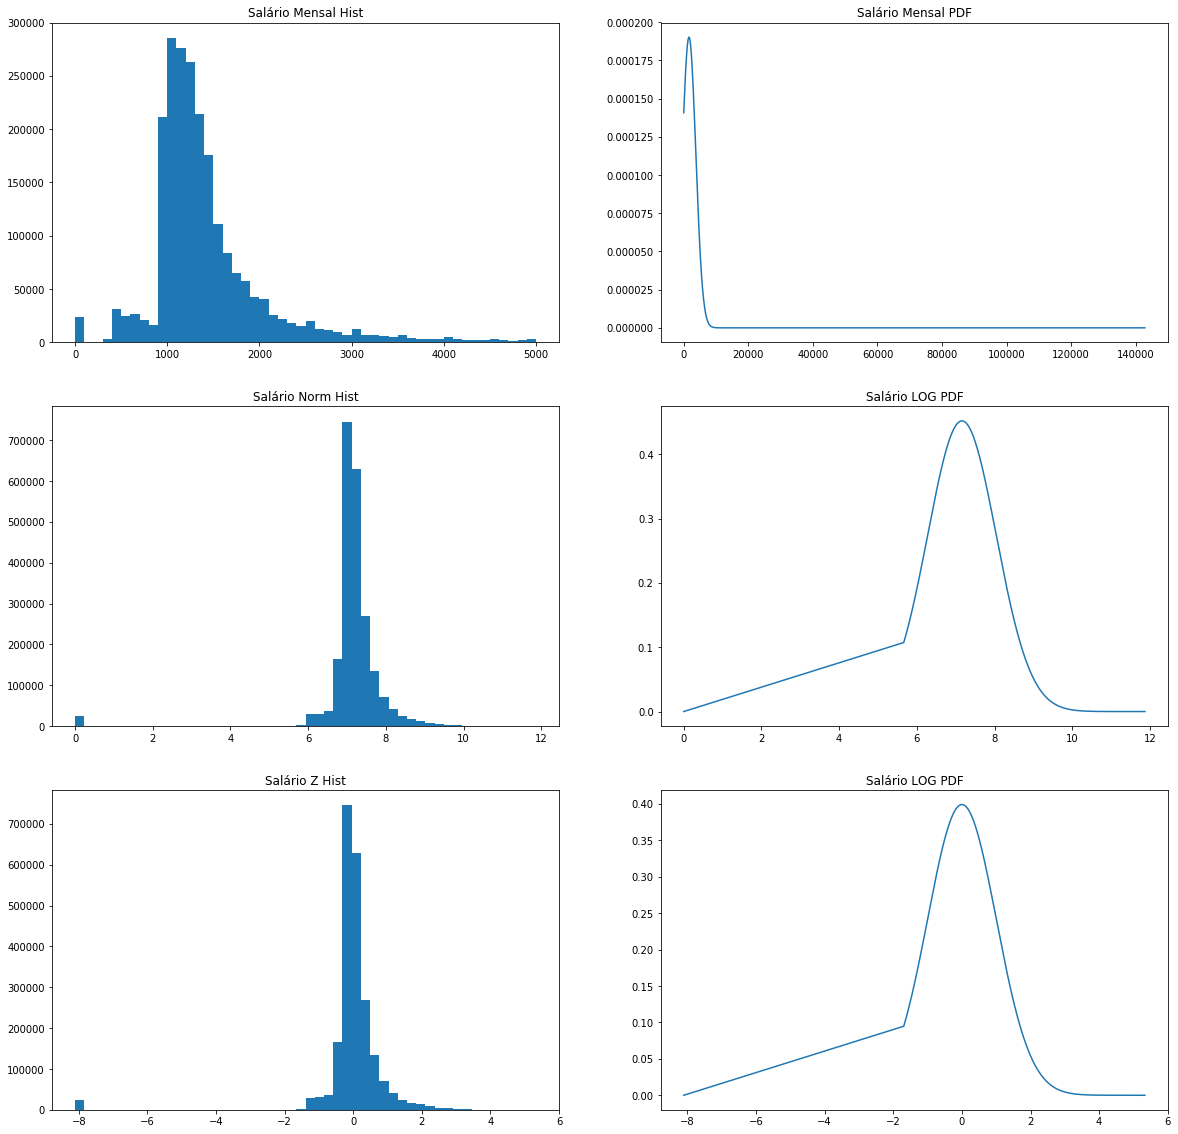

In [24]:
fig, ax = plt.subplots(3, 2,figsize=(20,20)) #cria a matriz de plotagem com 6 graficos

#plota o histograma do salario mensal
x = data.salario_mensal
ax[0,0].hist(x, bins=50, range=(0,5000))
ax[0,0].set_title("Salário Mensal Hist")

#plota a curva de densidade do salario mensal
x = data.salario_mensal.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax[0,1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[0,1].set_title("Salário Mensal PDF")

#plota o histograma do salario normalizado
x = data.salario_log
ax[1,0].hist(x, bins=50)
ax[1,0].set_title("Salário Norm Hist")

#plota a curva de densidade do salario mensal
x = data.salario_log.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax[1,1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[1,1].set_title("Salário LOG PDF")

#plota o histograma do salario Z
x = data.salario_padrao
ax[2,0].hist(x, bins=50)
ax[2,0].set_title("Salário Z Hist")

#plota a curva de densidade do salario mensal
x = data.salario_padrao.sort_values()
# calculando a média
mu = x.mean()
# calculando o desvio padrão populacional
sigma = x.std()#/len(df.salary)
# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax[2,1].plot(x, stats.norm.pdf(x, mu, sigma))
ax[2,1].set_title("Salário LOG PDF")

plt.show()

<br>
<img src="img/Exploração_Idade.png">
<br>

**Analisa o tipo de dado da variával Idade**

In [ ]:
data.salario_mensal.dtypes

<br>
<img src="img/Exploração_Instrução.png">
<br>

**Analisa o tipo de dado da variával "Grau de Instrução"**

In [25]:
data.grau_instrucao.dtypes

dtype('int64')

**Calcula a média, variância e desvio padrão**

In [29]:
n_grau_instrucao = len(data.grau_instrucao)
mean_grau_instrucao = data.grau_instrucao.mean()
std_amostral_grau_instrucao = np.std(data.grau_instrucao, ddof=1) 
var_amostral_grau_instrucao = std_amostral_grau_instrucao**2

print('Registros:',n_grau_instrucao)
print('Média:',mean_grau_instrucao)
print('Desvio-Padrão:',std_amostral_grau_instrucao)
print('Varância:',var_amostral_grau_instrucao)

Registros: 2256752
Média: 6.595547494806696
Desvio-Padrão: 1.5485383327955375
Varância: 2.397970968137183


**Plota o histograma**

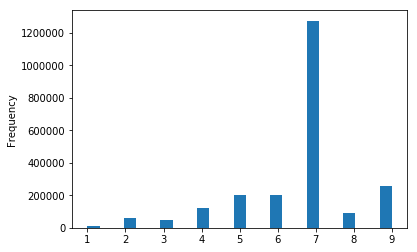

In [30]:
data.grau_instrucao.plot.hist(bins=25,)

**Verifica se é uma distribuição normal com a função scipy.stats.shapiro**

In [31]:
stats.shapiro(data.grau_instrucao)

(0.8100849986076355, 0.0)

**Normaliza a curva utilizando LOG (numpy.log) e salva em uma nova coluna "grau_instrucao_log"**

In [32]:
data["grau_instrucao_log"] = np.log(data.grau_instrucao)

**Verifica se é uma distribuição normal com a função scipy.stats.shapiro para "grau_instrucao_log"**

In [33]:
stats.shapiro(data.grau_instrucao_log)

(0.6717902421951294, 0.0)

**Calcula a padronização Z**

In [34]:
data["grau_instrucao_padrao"] = ( data.grau_instrucao - data.grau_instrucao.mean() ) / data.grau_instrucao.std()

**Plotar dispersão salario_log vs grau_instrucao (Apenas os 10000 primeiros registros)**

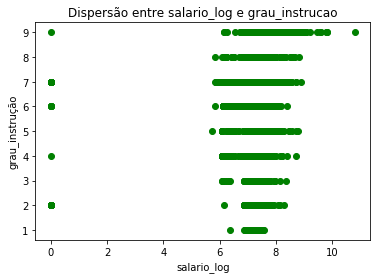

In [63]:
plt.plot(data.salario_log.head(10000), data.grau_instrucao.head(10000),'go')
plt.title('Dispersão entre salario_log e grau_instrucao')
plt.xlabel('salario_log')
plt.ylabel('grau_instrução')
plt.show()

**Mostra a correlação entre salario_log e grau_instrucao**

In [38]:
data[['salario_log',
      'grau_instrucao',
    ]].corr(method ='pearson')

,salario_log,grau_instrucao
salario_log,1.000000,0.110415
grau_instrucao,0.110415,1.000000


**CONCLUSÕES**

<br>
<img src="img/Exploração_Sexo.png">
<br>

**Analisa o tipo de dado da variával "Sexo"**

In [40]:
data.sexo.dtypes

dtype('int64')

**Calcula a média, variância e desvio padrão**

In [42]:
n_sexo = len(data.sexo)
mean_sexo = data.sexo.mean()
std_amostral_sexo = np.std(data.sexo, ddof=1) 
var_amostral_sexo = std_amostral_sexo**2

print('Registros:',n_sexo)
print('Média:',mean_sexo)
print('Desvio-Padrão:',std_amostral_sexo)
print('Varância:',var_amostral_sexo)

Registros: 2256752
Média: 1.4137029678050579
Desvio-Padrão: 0.4924966291446393
Varância: 0.24255292971883238


**Plota o histograma**

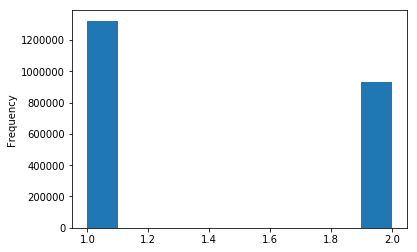

In [43]:
data.sexo.plot.hist()

**Plotar dispersão salario_log vs sexo (Apenas os 10000 primeiros registros)**

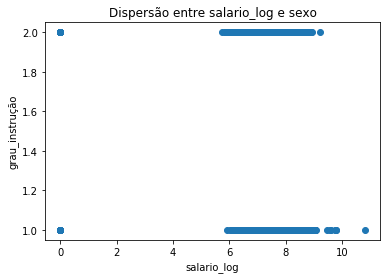

In [44]:
plt.plot(data.salario_log.head(10000), data.sexo.head(10000),'o')
plt.title('Dispersão entre salario_log e sexo')
plt.xlabel('salario_log')
plt.ylabel('grau_instrução')
plt.show()

**Correlação entre salario_log e sexo**

In [45]:
data[['salario_log',
      'sexo',
    ]].corr(method ='pearson')

,salario_log,sexo
salario_log,1.000000,-0.063652
sexo,-0.063652,1.000000


**CONCLUSÕES**

<br>
<img src="img/Exploração_RacaCor.png">
<br>

<br>
<img src="img/Hipotese.png">
<br>

<br>
<img src="img/Correlações.png">
<br>